# Fundamentals of Data Science
Winter Semester 2020

## Prof. Fabio Galasso, Alessandro Flaborea and Luca Franco
<galasso@di.uniroma1.it>, <flaborea.1841969@studenti.uniroma1.it>, <franco.luca.17@gmail.com>

## Exercise 2

In Exercise 2, you will re-derive and implement logistic regression and optimize the parameters with Gradient Descent and with the Newton's method. Also, in this exercise you will re-derive and implement Gassian Discriminant Analysis.
We will use the files logistic_x.txt and logistic_y.txt. The first contains the feature values $x^{(i)}_1$ and $x^{(i)}_2$ for the $i$-th data sample $x^{(i)}$. The second contains the ground truth label $y^{(i)}$ for each corresponding data sample.

Note that, differently from what seen in lecture, $y^{(i)}\in \{-1,1\}$.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.
Submit it by sending an email to galasso@di.uniroma1.it, flaborea.1841969@studenti.uniroma1.it and franco.luca.17@gmail.com by Wednesday November 25th, 23:59.

## Notation

- $x^i$ is the $i^{th}$ feature vector
- $y^i$ is the expected outcome for the $i^{th}$ training example
- $m$ is the number of training examples
- $n$ is the number of features

Let's start by setting up our Python environment and importing the required libraries:


## [15 points] Question 1: Logistic Regression with Gradient Ascent

### (a) [5 points] Equations for the log likelihood, its gradient, and the gradient ascent update rule.

Write and simplify the likelihood $L(\theta)$ and log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall the probabilistic interpretation of the hypothesis $h_\theta(x)= P(y=1|x;\theta)$ and that $h_\theta(x)=\frac{1}{1+\exp(-\theta^T x)}$.

Also derive the gradient $\frac{\delta l(\theta)}{\delta \theta_j}$ of $l(\theta)$ and write the gradient update equation. 

Question: in order to learn the optimal $\theta$, do you need to minimize or to maximize $l(\theta)$?

################# Do not write above this line #################

For Logistic Regression with Gradient Ascent, we want to have the $L(\theta)$ as the probabilistic interpretation of the hypothesis. In this case we want to **maximize** $L(\theta)$ to obtain the maximum likelihood of our multipication of probabilities (bernoulli) function:  $P(y \mid x; \theta ) =  \prod_{i = 1}^m (h_\theta(x_i)^{y_i} (1-h_\theta(x_i)^{1 - y_i}))$

In order to find the $\theta$ we should maximize our $L(\theta)$ because our target is Maximum Likelihood Estimation **MLE**, however, if we take the log of our likelihood $L(\theta)$ function (log-likelihood $l(\theta)$) we can find the maximum easier.


################# Do not write below this line #################

### (b) [10 points] Implementation of logistic regression with Gradient Ascent

Code up the equations above to learn the logistic regression parameters. Consider as data the files logistic_x.txt and logistic_y.txt. The first contains the feature values $x^{(i)}_1$ and $x^{(i)}_2$ for the $i$-th data sample $x^{(i)}$. The second contains the ground truth label $y^{(i)}$ for each corresponding data sample.

In [1]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import scipy as sp # imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes

# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns # sets up styles and gives us more plotting options

Let's start by loading the data into two pandas DataFrames:

In [2]:
df_x = pd.read_csv("./data/logistic_x.txt", sep="\ +", names=["x1","x2"], header=None, engine='python')
df_y = pd.read_csv('./data/logistic_y.txt', sep='\ +', names=["y"], header=None, engine='python')
df_y = df_y.astype(int)
df_x.head()

,x1,x2
0,1.343250,-1.331148
1,1.820553,-0.634668
2,0.986321,-1.888576
3,1.944373,-1.635452
4,0.976734,-1.353315


In [3]:
df_y.head()

,y
0,-1
1,-1
2,-1
3,-1
4,-1


Let's get the NumPy arrays from the dataset, and add a column of 1's to $X$ to take into account the zero intercept

In [4]:
x = np.hstack([np.ones((df_x.shape[0], 1)), df_x[["x1","x2"]].values])
y = df_y["y"].values

Adjust y so that $y^{(i)}\in [0,1]$

################# Do not write above this line #################

Your code here

In [5]:
#  MaxMin scaler , (y - min(y)) / (max(y) - min(y))
for i in range(len(y)):
    y[i] = (y[i] - np.min(y)) / (np.max(y) - np.min(y))

################# Do not write below this line #################

In [6]:
[x[:5,:],x[-5:,:]] # Plot the first and last 5 lines of x, now containing features x0 (constant=1), x1 and x2

[array([[ 1.        ,  1.3432504 , -1.3311479 ],
        [ 1.        ,  1.8205529 , -0.6346681 ],
        [ 1.        ,  0.98632067, -1.8885762 ],
        [ 1.        ,  1.9443734 , -1.635452  ],
        [ 1.        ,  0.97673352, -1.3533151 ]]),
 array([[ 1.        ,  4.7748538 ,  0.09941521],
        [ 1.        ,  5.8274854 , -0.69005848],
        [ 1.        ,  2.2894737 ,  1.9707602 ],
        [ 1.        ,  2.494152  ,  1.4152047 ],
        [ 1.        ,  2.0847953 ,  1.3567251 ]])]

In [7]:
[y[:5],y[-5:]] # Plot the first and last 5 lines of y

[array([0, 0, 0, 0, 0]), array([1, 1, 1, 1, 1])]

Define the sigmoid function "sigmoid", the function to compute the gradient of the log likelihood  "grad_l" and the gradient ascent algorithm.

################# Do not write above this line #################

Your code here

In [8]:
def sigmoid(x):
    pass # return the sigmoid of x
    g = 1. / (1. + np.exp(-x))
    return g

def log_likelihood(theta ,x ,y):
    pass # return the log likehood of theta according to data x and label y
    theta = np.reshape(theta, newshape= (1,len(theta)))
    z = np.dot(x, theta.T)
    y_p = sigmoid(z)
    log_l = 1/len(y) * (np.sum(np.dot(y, np.log(y_p)) + np.dot((1. - y), np.log(1. - y_p))))

    return log_l

def grad_l(theta, x, y):
    pass # return the gradient G of the log likelihood
    theta = np.reshape(theta, newshape= (1,len(theta)))
    y = np.reshape(y, newshape= (y.shape[0], 1))
    z = np.dot(x,  theta.T)
    y_p = sigmoid(z)
    error = (y - y_p)
    G = 1/len(y)*(np.dot(x.T, error).T[0])
    
    return G

def gradient_ascent(theta,x,y,G,alpha=0.01,iterations=100):

    m = len(y)
    log_l_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,3))

    pass # return the optimized theta parameters,
        # as well as two lists containing the log likelihood's and values of theta at all iterations

    for i in range(iterations):
        theta = theta + alpha * G(theta, x, y)      
        theta_history[i] = theta
        log_l_history[i] = log_likelihood(theta, x, y)
        
    return theta, log_l_history, theta_history         #Convert the matrix to an array and return the weight array

################# Do not write below this line #################

Check your grad_l implementation:
grad_l applied to the theta_test (defined below) should provide a value for log_l_test close to the target_value (defined below); in other words the error_test should be 0, up to machine error precision.

In [9]:
target_value = -0.4250958770469834
theta_test=np.array([-2,1,2])

log_l_test  = log_likelihood(theta_test,x,y)
error_test=np.abs(log_l_test-target_value)

print("{:f}".format(error_test))

0.000000


Let's now apply the function gradient_ascent and print the final theta as well as theta_history 

In [10]:
# Initialize theta0
theta0 = np.zeros(x.shape[1])

# Run Gradient Ascent method
n_iter=1000
theta_final, log_l_history, theta_history = gradient_ascent(theta0,x,y,grad_l,alpha=0.5,iterations=n_iter)
print(theta_final)
print(theta_history)

[-2.62008936  0.76027868  1.1719157 ]
[[-2.52525253e-03  2.40752765e-01  2.77415313e-01]
 [-9.46624841e-02  2.41740896e-02  4.84262297e-01]
 [-7.91257819e-02  2.89805031e-01  5.87796492e-01]
 ...
 [-2.62008225e+00  7.60277115e-01  1.17191517e+00]
 [-2.62008582e+00  7.60277900e-01  1.17191543e+00]
 [-2.62008936e+00  7.60278679e-01  1.17191570e+00]]


Let's plot the log likelihood over iterations

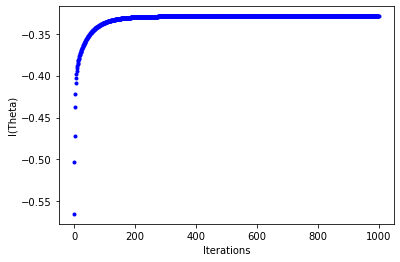

In [11]:
fig,ax = plt.subplots(num=2)

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history)),log_l_history,'b.')

Plot the data and the decision boundary:

In [12]:
df_x_pl=df_x.copy()
df_y_pl=df_y.copy()
df_x_pl.insert(0, "y", df_y)
df_x_pl["y"] = pd.to_numeric(df_x_pl["y"], downcast='signed')
df_x_pl.head()

,y,x1,x2
0,0,1.343250,-1.331148
1,0,1.820553,-0.634668
2,0,0.986321,-1.888576
3,0,1.944373,-1.635452
4,0,0.976734,-1.353315


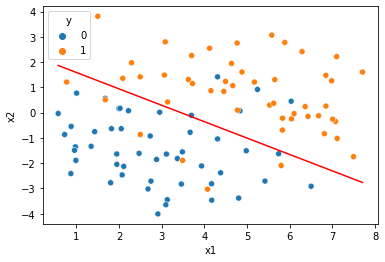

In [13]:
# Generate vector to plot decision boundary
x1_vec = np.linspace(df_x_pl["x1"].min(),df_x_pl["x1"].max(),2);

# Plot raw data
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

# Plot decision boundary
plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red");

# Save the theta_final value for later comparisons
theta_GA = theta_final.copy()

################# Do not write above this line #################

Write now your considerations. Discuss in particular:
- what effects do the learning rate $\alpha$ and the number of iterations have on the computed $\theta$? : <br>

According to general update rule of Gradient Ascent $\theta^{t+1}_{j} := \theta^{t}_{j} + \alpha \sum_{i = 1}^n [y^{(i)} - \sigma(\theta^{T}x^{(i)})]x^{(i)}_{j}$ which $\alpha$ (the learning rate) determines the size of our steps from $\theta^{t}_{j}$ to $\theta^{t+1}_{j}$. And number of iterations will determine how many times we are updating $\theta$ in order to converge to $\theta^{*}$ that maximize our likelihood function <br>


------------------------

- may you still achieve the same value if you decrease the learning rate $\alpha$ and increase the number of iterations n_iter up to an infinite number of them? Why? <br>

According to Gradient Ascent formula, if we choose a smaller $\alpha$ (decrease the magnitude of the step size) and increase the number of iterations, we would converge to ($\theta^{*}$) that is our local (or global) maxima. <br>
For instance, in Question 1 for computing the `theta_final` ($\theta^{*}$) we have used learning rate `alpha` = 0.5 and the number of iterations `n_iter` = 1000, we have `theta_final` = [-2.62008936,&nbsp;  0.76027868,&nbsp;  1.1719157 ], also looking at $l(\theta)$ plot:
<img src="plots/alpha(05)iter(1000).png">
Also looking at the decision boundary plot we notice the fine classification between true labels
<img src="plots/alpha(05)iter(1000)d.png">


if we decrease `alpha` to 0.005 and increase the `n_iter` to 100000, we'll reach `theta_final` = [-2.62007288,&nbsp;  0.76027505,&nbsp;  1.17191448] <br>
It is clear that even when we increased our detailing by 100 times, we still obtained almost the same `theta_final` which shows that are function reached maxima, although with unnecessary tiny steps, looking at $l(\theta)$ plot:
<img src="plots/alpha(0005)iter(100000).png">
At the same time, we can clearly see that decreasing `alpha` and increasing `n_iter` doesn't improve our classification:
<img src="plots/alpha(0005)iter(100000)d.png">


----------------

- may you still achieve the same value if you increase the learning rate $\alpha$ substantially and decrease the number of iterations n_iter? Why?

Substantiate your answer with experiments and plots of the $l(\theta)$ and the decision boundary.

<br> However, we should be careful not to choose too large alpha because it might not converge the maxima or even diverge by taking huge steps,for example using `alpha` = 1 and `n_iter` = 10, we'll reach `theta_final` = [-0.66608776,&nbsp;  0.20688891,&nbsp;  1.42581775] which is totally different than our desired $\theta^{*}$ which has a negative impact on our classification decision boundary, taking a look at  $l(\theta)$ plot we'll see that because of low number of `n_iter` and excess increase to `alpha` the we did not converge to maxima :
<img src="plots/alpha(1)iter(10).png">
Notice our decision boundary plot, it shows that our classifier are completely off the point and determined the binary classification extremely poor.
<img src="plots/alpha(1)iter(10)d.png">

################# Do not write below this line #################


## [15 points] Question 2: Logistic Regression with the Newton's method

### (a) [5 points] Equations for the Hessian of the log likelihood

Derive the equation for the Hessian matrix $H$ of the log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall that: $H_{i,j} = \frac{\delta^2 l(\theta)}{\delta \theta_i \delta \theta_j}$

Also write the parameter update rule for the Newton's method, as a function of the Hessian and gradient of $l(\theta)$.

Question: in order to learn the optimal $\theta$, do you need to minimize or to maximize $\nabla_{\theta} l$?

################# Do not write above this line #################

* The equation for the Hessian matrix $H$ of the log-likelihood $l(\theta)$ of the parameters $\theta$ :

We can write the equation for the Hessian matrix $H$ of the log-likelihood $l(\theta)$ of the parameters $\theta$ as:

$H_{k,l} = \frac{\delta^{2}}{\delta\theta_{k}\delta\theta_{l}}J(\theta) = -\frac{1}{m}\sum_{1=1}^{m} \frac{\delta}{\delta\theta_{l}}h_{\theta}(-y^{(i)}x^{(i)})y^{(i)}x_{k}^{(i)}$

$ = \frac{1}{m} \sum_{i=1}^{m}h_{\theta}(x^{(i)})(1-h_{\theta}(x^{(i)}))x_{l}^{i}x_{k}^{i} $


Here is the Hessian of the log-likelihood in its matricial form:

\begin{bmatrix}
  \frac{\delta^2 l(\theta)}{\delta \theta_1^2} & 
    \frac{\delta^2 l(\theta)}{\delta \theta_1 \delta \theta_2} & 
    \frac{\delta^2 l(\theta)}{\delta \theta_1 \delta \theta_3} \\[1ex]
  \frac{\delta^2 l(\theta)}{\delta \theta_2 \delta \theta_1} & 
    \frac{\delta^2 l(\theta)}{\delta \theta_2^2} & 
    \frac{\delta^2 l(\theta)}{\delta \theta_2 \delta \theta_3} \\[1ex]
  \frac{\delta^2 l(\theta)}{\delta \theta_3 \delta \theta_1} & 
    \frac{\delta^2 l(\theta)}{\delta \theta_3 \delta \theta_2} & 
    \frac{\delta^2 l(\theta)}{\delta \theta_3^2}
\end{bmatrix}


----------------------------

* The parameter update rule for the Newton's method, as a function of the Hessian and gradient of $l(\theta)$ :

According to the parameter update rule for the Newton's method, if we want to find the intercept of a function $f(\theta)$ at point $\theta$ such that $f(\theta) = 0$, we can choose a desired $\theta$ (here we call it $\theta_0$) and compute its derivative $f'(\theta_0)$ to obtain the value of the tangent slope of the curve $f(\theta)$ in $\theta_0$. <br> If we compute $f'(\theta) = 0$ we get a new $\theta$ (call it $\theta_1$) which is closer to our wanted intercept by a distance equal to $\Delta$, therefore, the general update rule for arriving at the optimal $\theta$ is, in the univariate case: <br>

$\theta_{t+1} = \theta_{t} - \frac{f(\theta)}{f'(\theta)}$ <br>

If we want to maximize the log-likelihood function $l(\theta)$, we need to find the optimal $\theta$ such that $l'(\theta) = 0$. If we are examining an univariate case, then we can make use of the parameter update rule for the Newton's method by writing: <br>

$\theta_{t+1} = \theta_{t} - \frac{l'(\theta)}{l''(\theta)}$ <br>

In a multivariate case we have a vector of partial derivatives at the numerator (Gradient) and a matrix of second order partial derivatives (Hessian) at the denominator: <br>

$\theta_{t+1} = \theta_{t} - H^{-1}_{l(\theta{i,j})} \nabla (\theta)$ <br>

where $H^{-1}{l(\theta{i,j})}$ is the inverse of the Hessian $(H{i,j}$).

----------------------

* To learn the optimal $\theta$, we need to MINIMIZE $\nabla_{\theta} l$. Here is the explanation:

To find the optimal $\theta$ we use the parameter update rule for the Newton's method. In an univariate case, by following this rule we iteratively move along the $x$ axis while updating our $\theta$, until we find the point where $l'(\theta) = 0$. By using this process we are actually minimizing the given function, hence we are *minimizing* the derivative of the log-likelihood function $l'(\theta)$. In a multivariate the principle remains the same, only in this case we need to *minimize* the gradient vector of the partial derivatives $\nabla_{\theta} l$.

################# Do not write below this line #################

### (b) [10 points] Implementation of logistic regression with the Newton's method

Code up the equations above to learn the logistic regression parameters. Consider as data the files logistic_x.txt and logistic_y.txt. The first contains the feature values  $x^{(i)}_1$ and $x^{(i)}_2$  for the  𝑖 -th data sample  $x^{(i)}$ . The second contains the ground truth label  $y^{(i)}$  for each corresponding data sample.

Define the Hessian function hess_l and the Newton's method function "newton":

################# Do not write above this line #################

Your code here

In [14]:
def hess_l(theta, x, y):
    pass # return the Hessian matrix hess
    m = len(y)
    y = np.reshape(y, newshape= (m, 1))
    theta = np.reshape(theta, newshape= (1,len(theta)))
    z = np.dot(x, theta.T)
    y_p = sigmoid(z)
    
    diag_mat = np.diag(np.diag(np.dot(y_p, (1-y_p).T)))
    hess = np.array((-1/m)*(x.T.dot(diag_mat)).dot(x))

    return hess


def newton(theta0, x, y, G, H, eps):
    theta_history = []    # append here the new array of thetas at each iteration    
    log_l_history = []    # append here the new array of log-likelihood at each iteration
    difference = np.inf
    
    while difference > eps:
        hess = H(theta0, x, y)
        grad = G(theta0, x, y)
        
        log_l_history.append(log_likelihood(theta0, x, y))
        theta_history.append(theta0)
        hessianInv = np.linalg.inv(hess)
        alpha = np.dot(hessianInv, grad.T)
        theta = theta0 - alpha
        difference = np.linalg.norm(np.subtract(theta0,theta))
        theta0 = theta
    
    theta_final = theta0
    
    return theta_final, theta_history, log_l_history #Convert the matrix to an array and return the weight array

################# Do not write below this line #################

Check your hess_l implementation: hess_l applied to the theta_test (defined below) should provide a value for hess_l_test close to the target_value (defined below); in other words the error_test should be 0, up to machine error precision.

In [15]:
target_value = np.array([[-0.14357024, -0.43836134,  0.18767787], \
                         [-0.43836134, -1.72295801,  0.61817001], \
                         [ 0.18767787,  0.61817001, -0.51247901]])
theta_test=np.array([-2,1,2])

hess_l_test  = hess_l(theta_test,x,y)
error_test=np.sum(np.abs(hess_l_test-target_value),axis=(0,1))

print("{:f}".format(error_test))

2.879550


Now run Newton's method to perform logistic regression:

In [16]:
# Initialize theta0
theta0 = np.zeros(x.shape[1])

# Run Newton's method
theta_final, theta_history, log_l_history = newton(theta0,x,y,grad_l,hess_l,1e-6)
print(theta_final)

[-2.6205116   0.76037154  1.17194674]


Let's plot the log likelihood over iterations

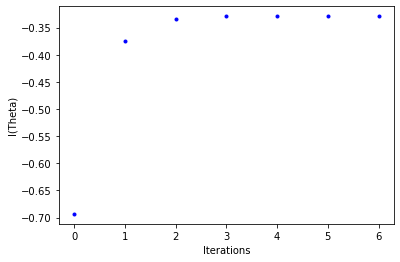

In [17]:
fig,ax = plt.subplots(num=2)

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history)),log_l_history,'b.')

Plot the data and our decision boundary:

In [18]:
df_x_pl=df_x.copy()
df_y_pl=df_y.copy()
df_x_pl.insert(0, "y", df_y)
df_x_pl["y"] = pd.to_numeric(df_x_pl["y"],downcast='signed')
df_x_pl.head()

,y,x1,x2
0,0,1.343250,-1.331148
1,0,1.820553,-0.634668
2,0,0.986321,-1.888576
3,0,1.944373,-1.635452
4,0,0.976734,-1.353315


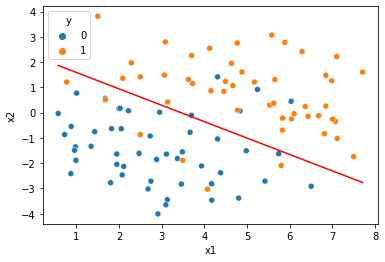

In [19]:
# Generate vector to plot decision boundary
x1_vec = np.linspace(df_x_pl["x1"].min(),df_x_pl["x1"].max(),2);

# Plot raw data
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

# Plot decision boundary
plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red");

################# Do not write above this line #################

Write now your considerations. Discuss in particular:
- the different convergence speed of the Newton's method, compared to Gradient Ascent
- the incurred cost for the different convergence speed

We can see how, thanks to Newton's method, we were able to converge to the maximum of the log-likelihood function (cost function) in barely 7 iterations (we can check the length of either the "log_l_history" or "theta_history" lists), whilst when using the Gradient Ascent a 1000 iterations were necessary for a given level of $\alpha = 0.5$.


This result is due to the fact that the gradient ascent algorithm is bounded to the constant level of the learning rate $\alpha$, which represents the step to be taken all they way up the function until we find the point of maximum. By implementing Newton's method, instead, we get closer to the optimal value much faster, given that, at every iteration, the updated value for $\theta$ gets closer and closer to its optimal value along a quadratic approximation of the derivative of the log-likelihood function. More specifically, we can say that with the Gradient Ascent method we converge to the maximum linearly, while with the Newton's method we converge quadratically. Another potential issue with using the gradient ascent method, is that if we do not choose our $\alpha$ carefully, we might even diverge from the actual maxima, and never reach it.

It is worth mentioning, though, that to be able to use Newton's method we need to have a cost function that has to be differentiable twice (so that we can get its second order partial derivatives to build the Hessian). Also, even though less iterations are needed, we need to consider that as the number of provided samples and parameters increase, it becomes harder for the machine to compute the Hessian and its inverse at every iteration step.

################# Do not write below this line #################


## [7 points] Question 3: Logistic Regression with non linear boundaries

### (a) Polynomial features for logistic regression

Define new features, e.g. of 2nd and 3rd degrees, and learn a logistic regression classifier by using the new features, by using the Newton's optimization algorithm (or the gradient ascent one, if you like).

In particular, we would consider a polynomial boundary with equation:

$f(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2 + c_3 x_1^2 + c_4 x_2^2 + c_5 x_1 x_2 + c_6 x_1^3 + c_7 x_2^3 + c_8 x_1^2 x_2 + c_9 x_1 x_2^2$

We would therefore compute 7 new features: 3 new ones for the quadratic terms and 4 new ones for the cubic terms.

Create new arrays by stacking x (from the previous questions) and the new 7 features (in the order x1x1, x2x2, x1x2, x1x1x1, x2x2x2, x1x1x2, x1x2x2). In particular create x_new_quad by additionally stacking with x the quadratic features, and x_new_cubic by additionally stacking with x the quadratic and the cubic features.

In [20]:
# First extract features x1 and x2 from x and reshape them to x1 vector arrays
x1 = x[:,1]
x2 = x[:,2]
x1 = x1.reshape(x1.shape[0], 1)
x2 = x2.reshape(x2.shape[0], 1)
print(x[:5,:]) # For visualization of the first 5 values
print(x1[:5,:]) # For visualization of the first 5 values
print(x2[:5,:]) # For visualization of the first 5 values

[[ 1.          1.3432504  -1.3311479 ]
 [ 1.          1.8205529  -0.6346681 ]
 [ 1.          0.98632067 -1.8885762 ]
 [ 1.          1.9443734  -1.635452  ]
 [ 1.          0.97673352 -1.3533151 ]]
[[1.3432504 ]
 [1.8205529 ]
 [0.98632067]
 [1.9443734 ]
 [0.97673352]]
[[-1.3311479]
 [-0.6346681]
 [-1.8885762]
 [-1.635452 ]
 [-1.3533151]]


################# Do not write above this line #################

Your code here

In [21]:
# Define features: x1x1, x2x2, x1x2, x1x1x1, x2x2x2, x1x1x2, x1x2x2

x1x1 = x1 * x1
x2x2 = x2 * x2
x1x2 = x1 * x2

x1x1x1 = x1 * x1 * x1
x2x2x2 = x2 * x2 * x2
x1x1x2 = x1 * x1 * x2
x1x2x2 = x1 * x2 * x2
    
# Stack the features together together with x, to define
# x_new_quad [x, x1x1, x2x2, x1x2]
x_new_quad = np.hstack((x, np.hstack((x1x1, x2x2, x1x2))))

# and x_new_cubic [x, x1x1, x2x2, x1x2, x1x1x1, x2x2x2, x1x1x2, x1x2x2]
x_new_cubic = np.hstack((x, np.hstack((x1x1, x2x2, x1x2, x1x1x1, x2x2x2, x1x1x2, x1x2x2))))

################# Do not write below this line #################

Now use the Newton's optimization algorithm to learn theta by maximizing the log-likelihood, both for the case of x_new_quad and x_new_cubic.

Note: you may alternatively use gradient ascent, as in Question 1, if you like.

In [22]:
# Initialize theta0, in case of quadratic features
theta0_quad = np.zeros(x_new_quad.shape[1])

# Run Newton's method, in case of quadratic features
theta_final_quad, theta_history_quad, log_l_history_quad = newton(theta0_quad,x_new_quad,y,grad_l,hess_l,1e-6)

# Initialize theta0, in case of quadratic and cubic features
theta0_cubic = np.zeros(x_new_cubic.shape[1])

# Run Newton's method, in case of quadratic and cubic features
theta_final_cubic, theta_history_cubic, log_l_history_cubic = newton(theta0_cubic,x_new_cubic,y,grad_l,hess_l,1e-6)

# check and compare with previous results
print(theta_final_quad)
print(theta_final_cubic)

[-2.01513398  0.17762534  1.91642971  0.07051926  0.18229119 -0.12953289]
[-15.80125013  11.84659121   8.30909256  -3.03962928   1.86524086
  -2.79099534   0.25914767   0.14781713   0.24456441  -0.30583232]


<ipython-input-8-bd0a460c7ad5>:11: RuntimeWarning: divide by zero encountered in log
  log_l = 1/len(y) * (np.sum(np.dot(y, np.log(y_p)) + np.dot((1. - y), np.log(1. - y_p))))


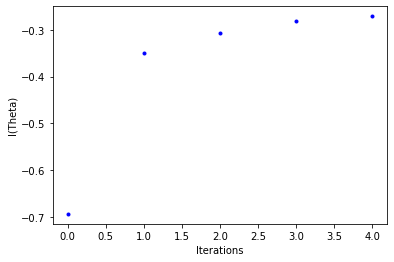

In [23]:
# Plot the log likelihood values in the optimization iterations, in one of the two cases.
fig,ax = plt.subplots(num=2)

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history_cubic)),log_l_history_cubic,'b.')

### (b) Plot the computed non-linear boundary and discuss the questions



First, define a boundary_function to compute the boundary equation for the input feature vectors $x_1$ and $x_2$, according to estimated parameters theta, both in the case of quadratic (theta_final_quad) and of quadratic and cubic features (theta_final_cubic). Refer for the equation to the introductory part of Question 3.

################# Do not write above this line #################

Your code here

In [24]:
def boundary_function(x1_vec, x2_vec, theta_final):
    
    x1_vec, x2_vec = np.meshgrid(x1_vec,x2_vec)
    
    if len(theta_final) == 6:
        # boundary function value for features up to quadratic
        c_0, c_1, c_2, c_3, c_4, c_5 = theta_final
        #f = lambda x1,x2: c_0 + c_1*x1 + c_2*x2 + c_3*x1*x1 + c_4*x2*x2 + c_5*x1*x2
        f = c_0 + c_1*x1_vec + c_2*x2_vec + c_3*x1_vec*x1_vec + c_4*x2_vec*x2_vec + c_5*x1_vec*x2_vec
    elif len(theta_final) == 10:
        # boundary function value for features up to cubic
        c_0, c_1, c_2, c_3, c_4, c_5, c_6, c_7, c_8, c_9 = theta_final
        #f =  lambda x1,x2: c_0 + c_1*x1 + c_2*x2 + c_3*x1*x1 + c_4*x2*x2 + c_5*x1*x2 + c_6*x1*x1*x1 + c_7*x2*x2*x2 + c_8*x1*x1*x2 + c_9*x1*x2*x2
        f = c_0 + c_1*x1_vec + c_2*x2_vec + c_3*x1_vec*x1_vec + c_4*x2_vec*x2_vec + c_5*x1_vec*x2_vec + c_6*x1_vec*x1_vec*x1_vec + c_7*x2_vec*x2_vec*x2_vec + c_8*x1_vec*x1_vec*x2_vec + c_9*x1_vec*x2_vec*x2_vec  
    else:
        raise("Number of Parameters is not correct")
        
    return x1_vec, x2_vec, f

################# Do not write below this line #################

Now plot the decision boundaries corresponding to the theta_final_quad and theta_final_cubic solutions.

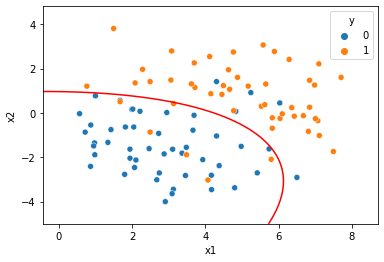

In [25]:
x1_vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_quad)

sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

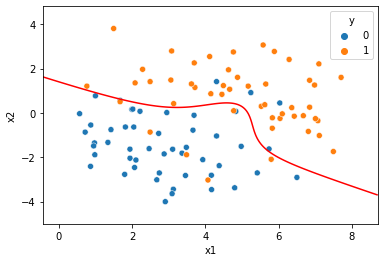

In [26]:
x1_vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_cubic)

sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

################# Do not write above this line #################

Write now your considerations. Discuss in particular:
- What happens if you further increase the degree of the polynomial. How would the boundary change? Would you incur underfitting or overfitting?

While working with Gradient Ascent and Newton's method, we observed that our classifier works as a linear model (i.e. degree 1 decision boundary) that finds the best line dividing two binary classes (Y labels i.e. 0 and 1) and fits the given data. However, in this case we are limited by the linearity of the decision boundary because we are dealing with a line with only 3 coefficients ( 𝑦𝑖=𝜃0+𝜃1𝑥1+𝜃2𝑥2 ).

By increasing the degree of the polynomial underlying our model to grade 3 we were able to predict more correctly. We have to be careful though not to increase it substantially: since our model was trained to perform best on the training set, when evaluating a new set of data ( or when validating data using the test set) we might end up overfitting the model. Unfortunately, we can not be sure about the best degree to give our polynomial in order for it to give the most accurate predictions. We can however estimate such optimal degree by reserving a fraction of our data to act as a validation set to test the accuracy of our model, one degree at a time, assessing the accuracy of it while it encounters new examples.

<br>

- Look at the boundary of the quadratic and cubic polynomial features. Do they meet your expectations? Why? Consider in particular the classifier decision boundary in areas where there are fewer training data, i.e. where the classifier is supposed to generalize. Hint: Try changing the minimum and maximum limits in vectors x1_vec and x2_vec before plotting the boundaries.

The decision boundaries more or less meet our expectations, because the number of dots in the wrong zone (with respect to the decision boundary) stayed the same when adding quadratic features, and decreased by 1 when adding cubic features. An unexpected result is that, as can be seen in the plots below, when the maximum and minimum are changed in feature vectors, when adding quadratic features the classifier generalizes worse than it did with only the original features, because in the former case one of the 4 dots at the extremes is in the wrong zone with respect to the decision boundary, while in the latter case they're all in the right zone. However, this problem is solved by adding the cubic features too.

In [27]:
df_x_pl_new = df_x_pl.copy(deep=True)
print(df_x_pl_new.idxmax(axis=0))
print(df_x_pl_new.idxmin(axis=0))

y     50
x1    64
x2    86
dtype: int64
y      0
x1    31
x2    12
dtype: int64


In [28]:
df_x_pl_new.loc[64, 'x1'] = 14
df_x_pl_new.loc[86, 'x2'] = 10
df_x_pl_new.loc[31, 'x1'] = -6
df_x_pl_new.loc[12, 'x2'] = -10

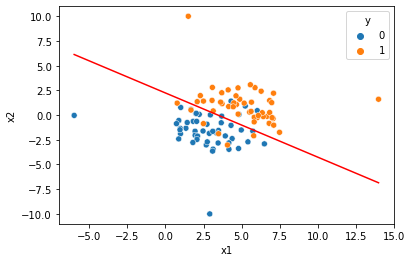

In [29]:
# Generate vector to plot decision boundary
x1_vec = np.linspace(df_x_pl_new["x1"].min(),df_x_pl_new["x1"].max(),2);

# Plot raw data
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl_new);

# Plot decision boundary
plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red");

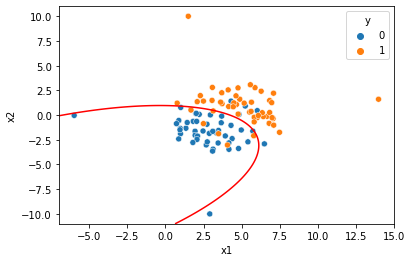

In [30]:
x1_vec = np.linspace(df_x_pl_new["x1"].min()-1,df_x_pl_new["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl_new["x2"].min()-1,df_x_pl_new["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_quad)

sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl_new);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

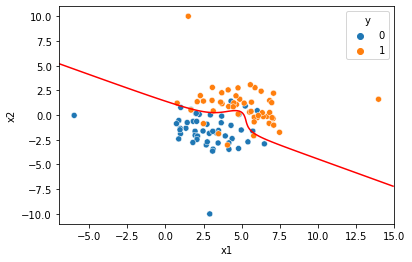

In [31]:
x1_vec = np.linspace(df_x_pl_new["x1"].min()-1,df_x_pl_new["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl_new["x2"].min()-1,df_x_pl_new["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_cubic)

sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl_new);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

The plots below clearly show that normalization (by subtracting the mean and dividing by the standard deviation) does not improve the results of the classifier.

<br>

In [32]:
df_x_pl_nor = df_x_pl.copy(deep=True)
(mean_y,mean_x1,mean_x2) = df_x_pl_nor.mean(axis=0)
(std_y,std_x1,std_x2) = df_x_pl_nor.std(axis=0)

In [33]:
df_x_pl_nor['x1'] = df_x_pl_nor['x1'].apply(lambda x : (x-mean_x1)/std_x1)
df_x_pl_nor['x2'] = df_x_pl_nor['x2'].apply(lambda x : (x-mean_x2)/std_x2)

In [34]:
df_x_pl_nor['x1x1'] = df_x_pl_nor['x1']*df_x_pl_nor['x1']
df_x_pl_nor['x2x2'] = df_x_pl_nor['x2']*df_x_pl_nor['x2']
df_x_pl_nor['x1x2'] = df_x_pl_nor['x1']*df_x_pl_nor['x2']
df_x_pl_nor['x1x1x1'] = df_x_pl_nor['x1']*df_x_pl_nor['x1']*df_x_pl_nor['x1']
df_x_pl_nor['x2x2x2'] = df_x_pl_nor['x2']*df_x_pl_nor['x2']*df_x_pl_nor['x2']
df_x_pl_nor['x1x1x2'] = df_x_pl_nor['x1']*df_x_pl_nor['x1']*df_x_pl_nor['x2']
df_x_pl_nor['x1x2x2'] = df_x_pl_nor['x1']*df_x_pl_nor['x2']*df_x_pl_nor['x2']
df_x_pl_nor['ones'] = 1.

In [35]:
x_new_quad_nor = df_x_pl_nor[['ones','x1','x2','x1x1','x2x2','x1x2']].to_numpy()
theta0_quad_nor = np.zeros(6)
theta_final_quad_nor = newton(theta0_quad_nor,x_new_quad_nor,y,grad_l,hess_l,1e-6)[0]

#theta0_cubic_nor = np.zeros(10)
x_new_cubic_nor = df_x_pl_nor[['ones','x1','x2','x1x1','x2x2','x1x2','x1x1x1','x2x2x2','x1x1x2','x1x2x2']].to_numpy()
theta0_cubic_nor = np.zeros(10)
theta_final_cubic_nor = newton(theta0_cubic_nor,x_new_cubic_nor,y,grad_l,hess_l,1e-6)[0]

<ipython-input-8-bd0a460c7ad5>:11: RuntimeWarning: divide by zero encountered in log
  log_l = 1/len(y) * (np.sum(np.dot(y, np.log(y_p)) + np.dot((1. - y), np.log(1. - y_p))))


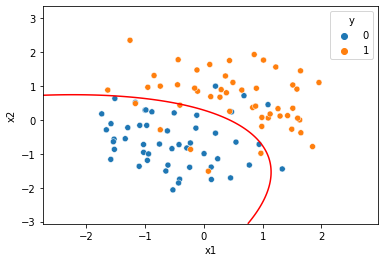

In [36]:
x1_vec = np.linspace(df_x_pl_nor["x1"].min()-1,df_x_pl_nor["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl_nor["x2"].min()-1,df_x_pl_nor["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_quad_nor)

sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl_nor);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

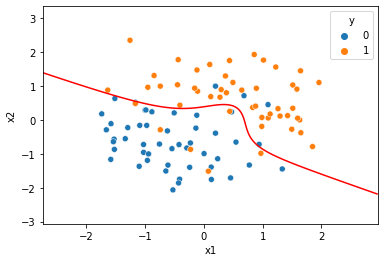

In [37]:
x1_vec = np.linspace(df_x_pl_nor["x1"].min()-1,df_x_pl_nor["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl_nor["x2"].min()-1,df_x_pl_nor["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_cubic_nor)

sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl_nor);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

<br>

- Look at the values of the original features, the 2nd and 3rd degree ones. Do you expect that normalizing the input features (either by setting their range to [-1,1] or by subtracting their mean and dividing by their standard deviation) would improve the classifier? Why yes or why not

The plots below clearly show that normalization (by subtracting the mean and dividing by the standard deviation) does not improve the results of the classifier. This result was expected because normalization is very useful for putting each feature in a similar range, but our features were already in a quite similar range

################# Do not write below this line #################


## [10 points, extra, not compulsory] Question 4: Gaussian Discriminant Analysis



### (a) Review and implement classification with Gradient Discriminant Analysis (GDA)

Recall the assumptions for GDA

$\begin{aligned} y & \sim \operatorname{Bernoulli}(\phi) \\ x \mid y=0 & \sim \mathcal{N}\left(\mu_{0}, \Sigma\right) \\ x \mid y=1 & \sim \mathcal{N}\left(\mu_{1}, \Sigma\right) \end{aligned}$

Recall the probability distributions:

$\begin{aligned} p(y) &=\phi^{y}(1-\phi)^{1-y} \\ p(x \mid y=0) &=\frac{1}{(2 \pi)^{d / 2}|\Sigma|^{1 / 2}} \exp \left(-\frac{1}{2}\left(x-\mu_{0}\right)^{T} \Sigma^{-1}\left(x-\mu_{0}\right)\right) \\ p(x \mid y=1) &=\frac{1}{(2 \pi)^{d / 2}|\Sigma|^{1 / 2}} \exp \left(-\frac{1}{2}\left(x-\mu_{1}\right)^{T} \Sigma^{-1}\left(x-\mu_{1}\right)\right) \end{aligned}$

Overall, the parameters of the model are $\phi, \Sigma, \mu_{0}$ and $\mu_{1}$ and the log-likelihood is given by:

$\begin{aligned} \ell\left(\phi, \mu_{0}, \mu_{1}, \Sigma\right) &=\log \prod_{i=1}^{n} p\left(x^{(i)}, y^{(i)} ; \phi, \mu_{0}, \mu_{1}, \Sigma\right) \\ &=\log \prod_{i=1}^{n} p\left(x^{(i)} \mid y^{(i)} ; \mu_{0}, \mu_{1}, \Sigma\right) p\left(y^{(i)} ; \phi\right) \end{aligned}$

Parameters may be estimated by maximum likelihood estimate as follows:

$\begin{aligned} \phi &=\frac{1}{n} \sum_{i=1}^{n} 1\left\{y^{(i)}=1\right\} \\ \mu_{0} &=\frac{\sum_{i=1}^{n} 1\left\{y^{(i)}=0\right\} x^{(i)}}{\sum_{i=1}^{n} 1\left\{y^{(i)}=0\right\}} \\ \mu_{1} &=\frac{\sum_{i=1}^{n} 1\left\{y^{(i)}=1\right\} x^{(i)}}{\sum_{i=1}^{n} 1\left\{y^{(i)}=1\right\}} \\ \Sigma &=\frac{1}{n} \sum_{i=1}^{n}\left(x^{(i)}-\mu_{y^{(i)}}\right)\left(x^{(i)}-\mu_{y^{(i)}}\right)^{T} \end{aligned}$

Consider the data variables as from the previous questions, x and y.
For this question, we would select features $x^{(i)}_1$ and $x^{(i)}_2$ into the new varible x12, dropping the $x_0=1$ convention.

In [38]:
# First extract the sole features x1 and x2 from x into an x12 array and reshape it to x2 vector arrays
x12 = x[:,1:]
print(x[:5,:]) # For visualization of the first 5 values
print(x12[:5,:]) # For visualization of the first 5 values
print(y[:5]) # For visualization of the first 5 values

[[ 1.          1.3432504  -1.3311479 ]
 [ 1.          1.8205529  -0.6346681 ]
 [ 1.          0.98632067 -1.8885762 ]
 [ 1.          1.9443734  -1.635452  ]
 [ 1.          0.97673352 -1.3533151 ]]
[[ 1.3432504  -1.3311479 ]
 [ 1.8205529  -0.6346681 ]
 [ 0.98632067 -1.8885762 ]
 [ 1.9443734  -1.635452  ]
 [ 0.97673352 -1.3533151 ]]
[0 0 0 0 0]


Now code up the equations above to learn the GDA parameters from the training data.


################# Do not write above this line #################


Your code here

In [39]:
def compute_phi(y):
    # your code here
    pass
    n = y.shape[0]
    return (1/n) * np.sum((y == 1).astype(int))


def compute_mu0(x, y):
    # your code here
    y_0_indices = np.argwhere((y == 0) == True)
    return np.mean(x[y_0_indices], axis = 0)[0]

def compute_mu1(x, y):
    # your code here
    pass
    y_1_indices = np.argwhere((y == 1) == True)
    return np.mean(x[y_1_indices], axis = 0)[0]

def compute_sigma(x, y, mu0, mu1):
  # your code here
    sigma =np.zeros(shape=(2,2))
    for i in range(len(y)):
        if y[i]==0:
            sigma+=np.dot((x[i]-mu0).reshape((2,1)),(x[i]-mu0).reshape((1,2)))
        elif y[i]==1:
            sigma+=np.dot((x[i]-mu1).reshape((2,1)),(x[i]-mu1).reshape((1,2)))
            
    return (1/len(y)) * sigma

# computing p(x|y) for the Bayes rule
def p_x_given_y(x,mu,sigma):
    # your code here
    d = len(x)
    left_side = 1/((np.power(2*np.pi, d/2)) * np.sqrt(np.linalg.det(sigma)))
        
    right_side = np.exp(-0.5 * np.dot(np.dot((x - mu), np.linalg.inv(sigma)), (x - mu)))
    return left_side * right_side


################# Do not write below this line #################


In [40]:
# Support functions

# Function p(y) for applying the Bayes rule
def p_y(y,phi):
    if y==1: return phi
    else: return 1-phi

In [41]:
# Now estimate the GDA parameters
phi = compute_phi(y)
mu0 = compute_mu0(x12,y)
mu1 = compute_mu1(x12,y)
sigma = compute_sigma(x12, y, mu0, mu1)

phi,mu0,mu1,sigma

(0.494949494949495,
 array([ 2.93068144, -1.44476469]),
 array([4.93616668, 0.76771897]),
 array([[ 2.68174521, -0.46404053],
        [-0.46404053,  1.88367821]]))

Now that we know both the distributions of $p(y)$ and $p(x|y)$, we may estimate the posterior probability for an input $x$ via Bayes Rule:

\begin{equation}
p(y \mid x)=\frac{p(x \mid y) p(y)}{p(x)}
\end{equation}
where $p(x)$ is the same for both classes and may be disregarded.

This is used to classify each data point, by comparing $p(y=1|x) \propto p(x \mid y=1) p(y=1)$ and $p(y=0|x) \propto p(x \mid y=0) p(y=0)$.

In [42]:
selected_example=1
print('Selected example =', x12[selected_example,:])

# compute p(y=0|x) ~ p(x|y=0)*p(y=0)  &  p(y=1|x) ~ p(x|y=1)*p(y=1)

# y=0
print('p(y=0|x) ~', p_x_given_y(x12[selected_example,:],mu0,sigma)*p_y(0,phi))

# y=1
print('p(y=1|x) ~', p_x_given_y(x12[selected_example,:],mu1,sigma)*p_y(1,phi))

Selected example = [ 1.8205529 -0.6346681]
p(y=0|x) ~ 0.026129116841520316
p(y=1|x) ~ 0.002061788276178494


### (b) Plot the estimated likelihood functions, the decision boundary and write your remarks


In [43]:
def boundary_gda(x1_vec, x2_vec, mu0, mu1, sigma, phi):
    
    x1_vec, x2_vec = np.meshgrid(x1_vec,x2_vec)
    
    f=np.zeros(x1_vec.shape)
    
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            x12_ij = np.array( (x1_vec[i,j],x2_vec[i,j]) )
            f[i,j] = p_x_given_y(x12_ij,mu1,sigma)*p_y(1,phi) - p_x_given_y(x12_ij,mu0,sigma)*p_y(0,phi)
            
    return x1_vec, x2_vec, f


x1_vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_gda(x1_vec, x2_vec, mu0, mu1, sigma, phi)

(-0.42920059, 8.705400599999999)

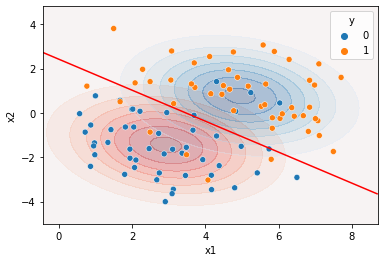

In [44]:
from matplotlib import cm
from scipy.stats import multivariate_normal

# Define Gaussian pdfs
rv0 = multivariate_normal(mu0, sigma)
rv1 = multivariate_normal(mu1, sigma)

pairx12 = np.dstack((x1_vec, x2_vec))

# plot pdf contours
plt.contourf(x1_vec, x2_vec, rv0.pdf(pairx12),alpha=0.5,cmap=cm.Reds)
plt.contourf(x1_vec, x2_vec, rv1.pdf(pairx12),alpha=0.35,cmap=cm.Blues)

# Add the GDA classification to the plot
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);
plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

plt.ylim(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1)
plt.xlim(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1)

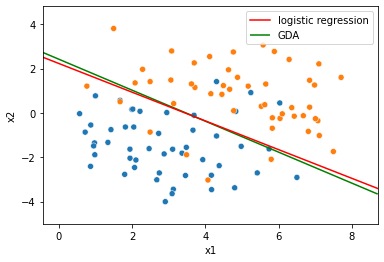

In [45]:
# For comparison with the Logistic Regression boundary

# Generate vector to plot decision boundary
x1vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,2)

# Plot raw data
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl)

# Plot decision boundary
log, = plt.plot(x1vec,(-x1vec*theta_GA[1]-theta_GA[0])/theta_GA[2], color="red")
gda = plt.contour(x1_vec, x2_vec, f, colors="green", levels=[0])

plt.legend([log, gda.collections[0]],['logistic regression','GDA'])

plt.ylim(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1)
plt.xlim(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1)

# plt.legend()
plt.show()

Write now your considerations. Discuss in particular:
- Gaussian Discriminant Analysis makes stronger modelling assumptions than logistic regression. When may this be helpful and where may this be harmful?

The first assumption, probably the most obvious one, is the normality of the prior $p(x | y)$. 
Although in some cases this may prove to be true and perform well, in some others it might derail our results simply because the input does not follow a normal distribution - to be clear, we can encounter this in any parametric model that make such assumptions.

In the case of multivariate GDA this might be dangerous, as *all* input is required to fit a Gaussian - some variables might not, therefore our results could suffer.

The logistic regression does not make such an assumption and may be more useful at managing inputs where each is not limited to a gaussian; it shifts the distribution assumption to the dependent variable.

The linearity of the decision boundary alone might not be much useful in the case of the targets being non-linearly separable, and a (linear) logistic regression might have difficulties describing that, whereas the GDA might not. The non-linear extension of the LR might. 

Also in GDA, the covariance matrix might help us! Suppose we have $x \in \mathbb{R}^2$, and $y \in \mathbb{R}$, where values of $y$ are distant and concentrated like in the plot:

![https://it.mathworks.com/help/examples/stats/win64/ClusterDataUsingAGaussianMixtureModelExample_01.png](./GaussianMixture.png)

(Source: mathworks.com)

In this case the logistic regression would have a hard time making a decision boundary (horizontal? oblique?); the point is: altough it eventually finds one we can't be sure it will perform well with future data. 

For a GDA model it's an easy task. We can clearly see where the values are concentrated and their spread. Just calculate $\mu_{0}, \mu_{1}$, define $\Sigma$, and that's it.

But again, it all depends on the underlying distributions.

Credits for material: Andrew Ng, C. Combier